In [1]:
import time, sys
from mido import MidiFile
import numpy as np
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from IPython.display import display, clear_output

In [2]:
srate = 44100

# Convert MIDI note number to frequency.
def note_to_freq(note):
    return 440 * 2 ** ((note - 69) / 12)

# Creates triangle sound
def generate_triangle(freq, dur=1, amp=1.0, sr=44100):
    t = np.arange(0, dur, 1.0/sr)
    return 2 * (2*np.floor(freq*t) - np.floor(2*freq*t)) + 1

# this sounds good too, but not so "chiptune". I left it here in case we switch
def triangle_wave(freq:float, dur:float=1.0, sr:float=44100):

    t = np.arange(0, dur, 1.0/sr)
    x = np.zeros(t.shape[0])
    for i in range(4):
        n = 2*i + 1
        x += ((-1)**i)*(n**(-2))*(np.sin(2*np.pi*freq*n*t))
    return (8/(np.pi**2)) * x

In [3]:
mid = MidiFile('debussy-clair-de-lune.mid')
notes = []

for i, track in enumerate(mid.tracks):
    
    for msg in track:
        
        # Note on event: only counts if velocity is greater than 0 and time grater than 10 ()
        if msg.type == 'note_on' and msg.velocity > 0 and msg.time > 10:
            note = round(note_to_freq(msg.note))
            # Convert time to seconds
            time = msg.time * 0.005
            velocity = msg.velocity
            notes.append(('on', note, time, velocity))
            
        # Note off event: Basically "pauses"
        elif msg.type == 'note_off' and msg.time > 10:
            note = round(note_to_freq(msg.note))
            time = msg.time * 0.005
            velocity = msg.velocity
            notes.append(('off', note, time, velocity))

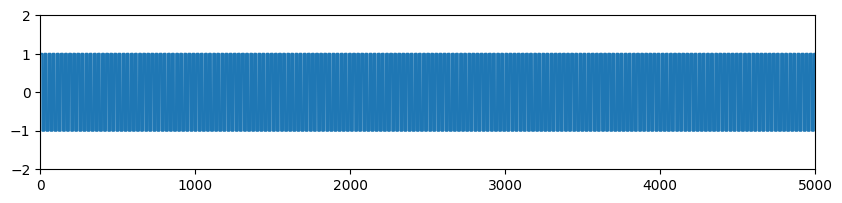

In [4]:
sound_arr = []
fig = plt.figure(figsize=(10, 2))
temp_plot = fig.add_subplot()

for i in range(len(notes) - 1):
    if i == len(notes) - 1:
        break;
        
    currentNote = notes[i]
    nextNote = notes[i + 1]
    
    if (currentNote[0] == 'on' and currentNote[3] > 0):
        # Calculating time using delta time between two notes
        sound = generate_triangle(currentNote[1], dur=nextNote[2])
        sound_arr = np.hstack([sound_arr,sound])

 
    elif (currentNote[0] == 'off'):
        sound = generate_triangle(0, dur=nextNote[2])
        sound_arr = np.hstack([sound_arr,sound])
        
    temp_plot.clear()
    temp_plot.axis(xmin = 0, xmax = 5000, ymin = -2, ymax = 2)
    temp_plot.plot(sound)
    display(fig)
    clear_output(wait=True)
    


In [5]:
# just using the first minute as the entire music (5 min) takes long to process
ipd.Audio(sound_arr[:3000000], rate=srate)